In [19]:


import sys
import os
# Go up one directory, then into scripts/
sys.path.append(os.path.abspath("../scripts"))

# Load and clean
df = load_data("../Data/MSFT_historical_data.csv")


In [14]:
from data_cleaning import load_data, clean_data, count_invalid_dates
print("Invalid date count before cleaning:", count_invalid_dates(df))
df = clean_data(df)
print("Data loaded and cleaned. Shape:", df.shape)
df.head()

Invalid date count before cleaning: 0
Data loaded and cleaned. Shape: (9672, 9)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [15]:
from indicators import add_technical_indicators
df = add_technical_indicators(df)
# Preview
df[['Date', 'Close', 'SMA_20', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']].tail(10)

,Date,Close,SMA_20,RSI_14,MACD,MACD_Signal,MACD_Hist
9662,2024-07-17,443.519989,454.201001,45.565538,4.632632,7.301769,-2.669137
9663,2024-07-18,440.369995,453.902501,43.052471,3.253147,6.492045,-3.238898
9664,2024-07-19,437.109985,453.473000,40.559301,1.875223,5.568681,-3.693457
9665,2024-07-22,442.940002,453.131000,46.523504,1.239356,4.702816,-3.463460
9666,2024-07-23,444.850006,452.989999,48.351906,0.879410,3.938134,-3.058724
9667,2024-07-24,428.899994,451.887498,36.980921,-0.684986,3.013510,-3.698496
9668,2024-07-25,418.399994,450.199498,31.696381,-2.740453,1.862718,-4.603171
9669,2024-07-26,425.269989,448.820497,37.944660,-3.771598,0.735855,-4.507452
9670,2024-07-29,426.730011,447.809497,39.217239,-4.420024,-0.295321,-4.124703
9671,2024-07-30,422.920013,446.118997,37.080269,-5.181612,-1.272579,-3.909033


c:\Users\User\Desktop\Week_1\Nova-Financial-Solutions_Forecasting\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


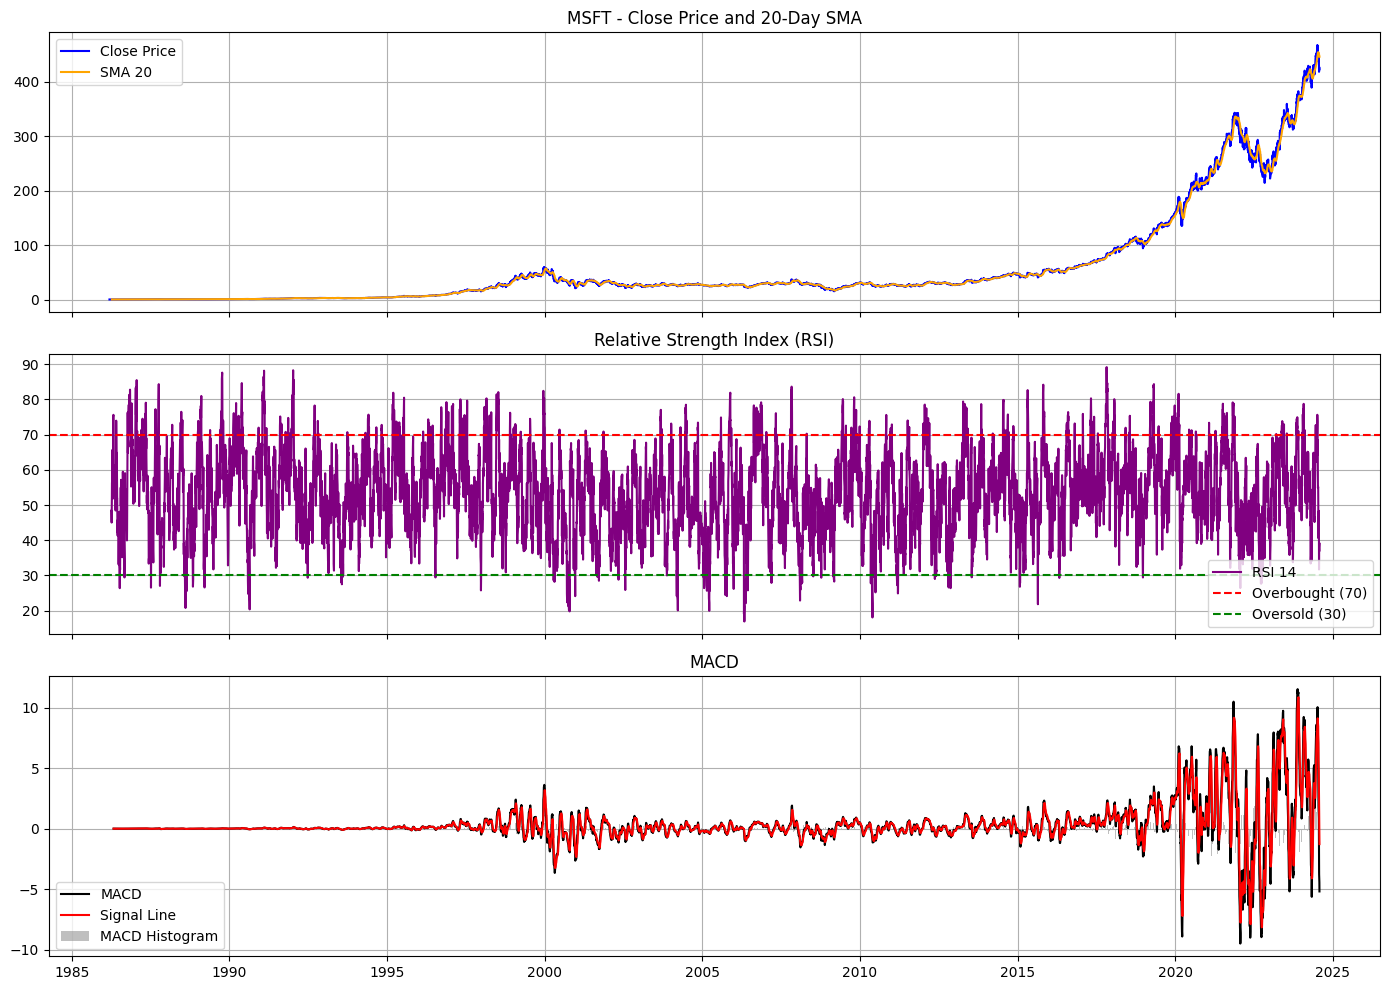

In [18]:
from visuals import plot_indicators
plot_indicators(df, ticker_name="MSFT")


📊 Technical Indicator Summary (Last 10 Days)
Column	Description
Date	Trading date of each entry.
Close	The stock's closing price on that day.
SMA_20	20-day Simple Moving Average of the closing price — smooths out short-term fluctuations.
RSI_14	14-day Relative Strength Index — indicates momentum. Values:
🔹 Below 30 = Oversold (buy signal)
🔺 Above 70 = Overbought (sell signal)
MACD	Moving Average Convergence Divergence line — shows trend strength and direction.
MACD_Signal	9-day EMA of MACD — used to signal potential trend reversals.
MACD_Hist	MACD Histogram — difference between MACD and Signal line:
🔺 Positive → Bullish momentum
🔻 Negative → Bearish momentum

🔍 Interpretation (Example Insights from the Table)
Let's look at the last few rows to interpret signals:

RSI:
RSI values are generally below 50, with some even dipping near 30, e.g., 31.69, 36.98, suggesting the stock was potentially oversold and may attract buying interest.

MACD & MACD Histogram:
The MACD values are negative and decreasing (e.g., -2.74, -3.77, -4.42, -5.18), while the MACD Histogram remains strongly negative, indicating strong bearish momentum.

This trend shows the MACD line is consistently below the Signal line, suggesting a continued downtrend.

SMA:
The SMA_20 is significantly higher than the closing price (e.g., SMA_20 = 454, Close = 437), which confirms the bearish sentiment — the price is trading well below its recent average.

✅ Key Takeaways:
Momentum is weak (low RSI).

Bearish signals dominate (MACD < Signal, negative histogram).

The stock is under pressure and hasn't shown clear reversal signals yet.

If you're using this for trading logic, you might:

Wait for MACD to cross above Signal (potential buy).

Watch for RSI to rebound above 30–40.

Look for a candlestick reversal pattern alongside indicators.